> ## Exploratory Data Analysis of the Bank Transactions dataset
>> ### MDDB Group A - Team 1 - AI Methods for Business
>
>> ### Nadia Aflatounian
>> ### Max Heijmans
>> ### Carl Hümbs
>> ### Can Senturk

> The goal of this Jupyter notebook and EDA is to answer the business question put forward, namely:
>> Can clustering analysis help identify different customer segments to tailor products or services? 
>
> Similarly, to help answer the business question holistically, the following sub questions need to be answered:
>> Who are the different types of customers?
>>
>> Can we identify distinct groups based on account balances, transactions done over time, and location?
>>
>> How does customer behavior vary across different segments?

<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Importing the necessary libraries and reading the dataset</h1>
</div>

In [1]:
# Importing the basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import os

# Display all columns 
from IPython.display import display
pd.set_option('display.max_columns', None)

# Ignore some plotnine junk warnings. TODO: check what is generating the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
bank_transactions_data = pd.read_csv(r"bank_transactions.csv", delimiter=',')

# Refer to dataset as a dataframe, common best practice
df_bank = bank_transactions_data

# Check length of the dataset
df_original_len = len(df_bank)

# Print outcomes
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(df_bank.shape[0], df_bank.shape[1]))

Original length of dataframe: 1048567
There are 1048567 rows and 9 columns in the dataset


In [3]:
# Print out the head and tail of the dataset
df_bank.head()
df_bank.tail()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [4]:
# Describe the columns Customer Gender and Customer Location
# Find out how many genders and locations there are in the dataset
df_bank[['CustGender', 'CustLocation']].describe()

,CustGender,CustLocation
count,1047467,1048416
unique,3,9355
top,M,MUMBAI
freq,765530,103595


In [5]:
# Find out the time span of the data set
# Convert the 'TransactionDate' column to datetime  datatype
df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'])

# Find the earliest and latest dates
earliest_date = df_bank['TransactionDate'].min()
latest_date = df_bank['TransactionDate'].max()

# Calculate the time span
time_span = latest_date - earliest_date

# Print outcomes
print(f"Earliest transaction date: {earliest_date}")
print(f"Latest transaction date: {latest_date}")
print(f"Time span of the data: {time_span}")

Earliest transaction date: 2016-01-08 00:00:00
Latest transaction date: 2016-12-09 00:00:00
Time span of the data: 336 days 00:00:00


<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 2</span>
    <h1 style="font-size: 30px;">Cleaning the dataset</h1>
</div>

In [6]:
# Print out the data types and counts
df_bank.info()

# Calculate the percentage of missing values for each column
missing_percentage = df_bank.isnull().mean() * 100

# Display the missing percentages
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  object        
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 72.0+ MB
TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustG

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>TransactionID</b></font></div>

In [7]:
# Check if the values in column 'TransactionID' are unique
if (len(df_bank['TransactionID'].unique()) == len(df_bank)):
    print("TransactionID column has unique values, no need to aggregate")
else:
    print("TransactionID column does not have unique values, need to aggregate")

TransactionID column has unique values, no need to aggregate


In [8]:
# Dropping the TransactionID column since it is not going to be used in modeling and they are unique
#bank_transactions_data = bank_transactions_data.drop('TransactionID', axis=1)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Missing Values</b></font></div>
>
>> We addressed missing values in the dataset with strategies tailored to each column's characteristics:
>
>> 1. **CustomerDOB**: Dropped rows with missing values, as age is vital for our analysis and the missing percentage was low (0.32%).
>
>> 2. **CustGender**: Filled missing values with the mode, given the minimal missing data (0.10%), ensuring gender distribution remains unaffected.
>
>> 3. **CustLocation**: Also filled with the mode due to an insignificant percentage of missing values (0.01%), maintaining geographical consistency.
>
>> 4. **CustAccountBalance**: Missing values were filled with the median to avoid skewing by outliers, suitable for a numerical variable with potential for skewed distribution.
>
>> These methods ensure data integrity, especially for crucial variables like age, and maintain the overall data distribution for reliable analysis.

In [9]:
# Filling missing values
# Drop rows where CustomerDOB is `NaN`
df_bank.dropna(subset=['CustomerDOB'], inplace=True)
# Impute missing data for CustGender with `mode`
df_bank['CustGender'].fillna(df_bank['CustGender'].mode()[0], inplace=True)
# Impute missing data for CustLocation with `mode`
df_bank['CustLocation'].fillna(df_bank['CustLocation'].mode()[0], inplace=True)
# Impute missing data for CustAccountBalance with `median`
df_bank['CustAccountBalance'].fillna(df_bank['CustAccountBalance'].median(), inplace=True)

# Print the count of missing values for each column after cleaning
print(df_bank.isnull().sum())

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64


In [10]:
# Check for duplicate rows
duplicate_rows = df_bank.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [11]:
# Show details of dataset
def check(df_bank):
    l=[]
    columns=df_bank.columns
    for col in columns:
        dtypes=df_bank[col].dtypes
        nunique=df_bank[col].nunique()
        sum_null=df_bank[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','num_unique','sum_null']
    return df_check 
check(bank_transactions_data)

,column,dtypes,num_unique,sum_null
0,TransactionID,object,1045170,0
1,CustomerID,object,881893,0
2,CustomerDOB,object,17254,0
3,CustGender,object,3,0
4,CustLocation,object,9303,0
5,CustAccountBalance,float64,160853,0
6,TransactionDate,datetime64[ns],55,0
7,TransactionTime,int64,81885,0
8,TransactionAmount (INR),float64,92624,0


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>TransactionDate</b></font></div>

#### We extract day and month from Transaction date to check for any difference in transacation paterns over time and also create a new feature "DaysSinceLastTransaction" 

In [12]:
from datetime import datetime

# Extracting day, month, and year from TransactionDate
df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'], errors='coerce')
df_bank['TransactionDay'] = df_bank['TransactionDate'].dt.day
df_bank['TransactionMonth'] = df_bank['TransactionDate'].dt.month

> <font color='white' style='font-size: 15px;'><b>Plot for Number of Transactions per Month</b></font>

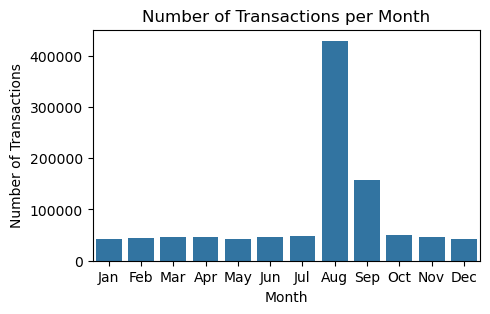

In [13]:
# Counting transactions per month
transactions_per_month = df_bank.groupby('TransactionMonth').size()

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=transactions_per_month.index, y=transactions_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##### Based on the above plot, most transactions happen in August (400K+) and September (±150K)

> <font color='white' style='font-size: 15px;'><b>Plot for Number of Transactions Based on Day of the Month</b></font>

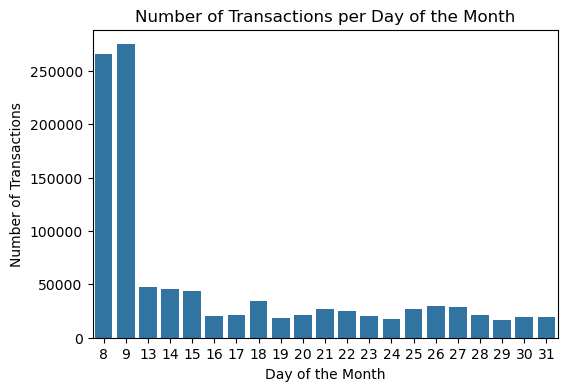

In [14]:
# Counting transactions per day of the month
transactions_per_day = df_bank.groupby('TransactionDay').size()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Day of the Month')
plt.show()


##### Based on the above plot, most transactions happen on the 8th and 9th day of the month (250K+ each)

> <font color='white' style='font-size: 15px;'><b>General Plot Based on Date</b></font>

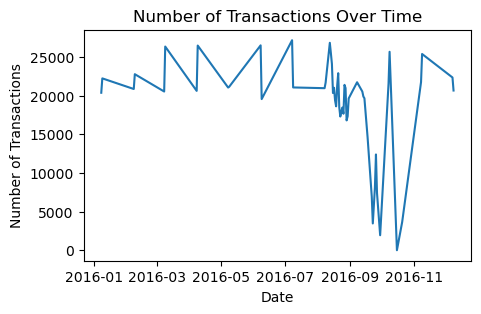

In [15]:
# Counting transactions per date
transactions_per_date = df_bank.groupby(df_bank['TransactionDate'].dt.date).size()

# Plotting
plt.figure(figsize=(5, 3))
transactions_per_date.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.show()

#### Based on the above plot, the number of transactions over time have always fluctuated, the transactions per day of the month is reflected in this plot as well. There was a significant drop of transactions after September, but a subsequent steep increase and decrease in October.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>TransactionTime</b></font></div>

In [16]:
# Function to extract hour from HH:MM:SS format
def extract_hour(time_int):
    time_str = str(time_int).zfill(6)  # Ensure the string has 6 digits
    hour = int(time_str[:2])  # Extract the first two characters and convert to datatype: int
    return hour

# Apply the function to extract the hour 
df_bank['TransactionHour'] = df_bank['TransactionTime'].apply(extract_hour)
# Drop Transaction time 
df_bank = df_bank.drop('TransactionTime', axis=1)

> <font color='white' style='font-size: 15px;'><b>Plot Based on Transactions per Hour of the Day</b></font>

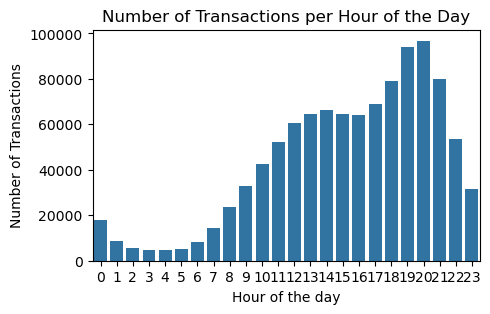

In [17]:
# Counting transactions per hour of the day
transactions_per_hour = df_bank.groupby('TransactionHour').size()

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=transactions_per_hour.index, y=transactions_per_hour.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Hour of the Day')
plt.show()

#### Most transactions happen between 18h and 21h, all in all, it seems that the later in the day, the more transactions happen

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>CustomerDOB</b></font></div>

In [18]:
# Convert CustomerDOB to datetime and calculate age of customers
year_of_data = 2016
df_bank['CustomerDOB'] = pd.to_datetime(df_bank['CustomerDOB'], errors='coerce')
df_bank['Age'] = year_of_data - df_bank['CustomerDOB'].dt.year


In [19]:
# Drop the column CustomerDOB as it is no longer necessary
df_bank = df_bank.drop('CustomerDOB', axis=1)

In [20]:
df_bank

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),TransactionDay,TransactionMonth,TransactionHour,Age
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,8,2,14,22
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,27999.0,8,2,14,-41
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,459.0,8,2,14,20
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,2060.0,8,2,14,43
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,8,2,18,28
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,M,NEW DELHI,7635.19,2016-09-18,799.0,18,9,18,26
1048563,T1048564,C6459278,M,NASHIK,27311.42,2016-09-18,460.0,18,9,18,24
1048564,T1048565,C6412354,M,HYDERABAD,221757.06,2016-09-18,770.0,18,9,18,27
1048565,T1048566,C6420483,M,VISAKHAPATNAM,10117.87,2016-09-18,1000.0,18,9,18,38


> <font color='white' style='font-size: 15px;'><b>Plot for the Distribution of Customer Age v1</b></font>

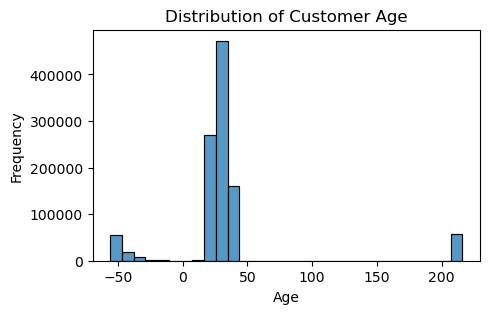

In [21]:
plt.figure(figsize=(5, 3))
sns.histplot(df_bank['Age'], bins=30, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

#### This plot shows the distribution in customer age, but it is hard to read as there seem to be extreme outliers.

In [22]:
# Replace negative and age >100 with NaN
df_bank.loc[(df_bank['Age'] < 0) | (df_bank['Age'] > 100), 'Age'] = np.nan

# Impute missing values in the 'Age' column with -1
df_bank['Age'].fillna(-1, inplace=True)

> <font color='white' style='font-size: 15px;'><b>Plot for the Distribution of Customer Age v2</b></font>

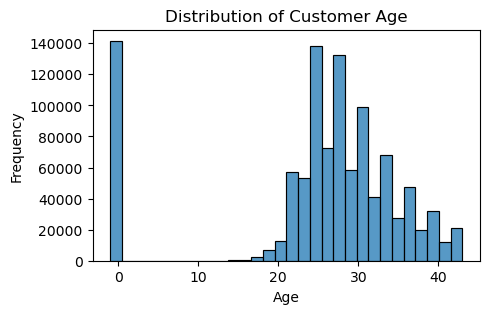

In [23]:
plt.figure(figsize=(5, 3))
sns.histplot(df_bank['Age'], bins=30, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

#### The above plot shows a better distribution in customer age, with most customers in the age range of 25-35. Yet, replacing the negative and >100 years of age with '-1' has grouped 140K people. Later we will try KNN for age imputation after we encoded and cleaned other columns.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>CustGender</b></font></div>

In [24]:
# Checking Gender column
df_bank.CustGender.value_counts()

M    763839
F    281330
T         1
Name: CustGender, dtype: int64

In [25]:
# Since there is just one Gender: T we will drop it
df_bank.drop(df_bank[bank_transactions_data['CustGender']=='T'].index,inplace=True)

> <font color='white' style='font-size: 15px;'><b>Plot for the Distribution of Customer Gender</b></font>

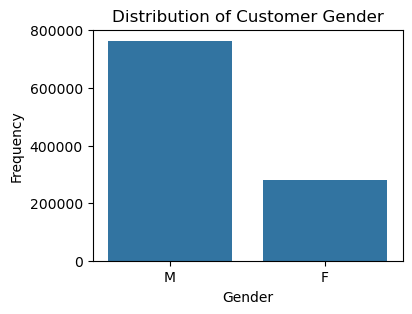

In [26]:
# Counting the frequency of each gender
gender_count = df_bank['CustGender'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(4, 3))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Gender')
plt.show()

#### The above plot shows that there are about 1/3 the amount of females as there are males.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>CustLocation</b></font></div>

#### Because the are too many unique values in the `CustLocation` column and many of them are just different variations of other cities, we decided to replace the values of cities with less that 500 transaction to `other` to decrease the number of unique valuses 

In [27]:
# Total number of unique cities
total_unique_cities = df_bank['CustLocation'].nunique()

# Counting transactions per city
transactions_per_city = df_bank['CustLocation'].value_counts()

# Identifying cities with fewer than 500 transactions
cities_with_less_than_500 = transactions_per_city[transactions_per_city < 500].index.tolist()

# Counting the number of such cities
number_of_cities_less_than_500 = len(cities_with_less_than_500)

# Calculating the percentage
percentage_of_cities_with_less_than_500 = (number_of_cities_less_than_500 / total_unique_cities) * 100

# Filtering the DataFrame to include only transactions in these cities
transactions_in_cities_less_than_500 = df_bank[df_bank['CustLocation'].isin(cities_with_less_than_500)]

# Counting the number of transactions in these cities
number_of_transactions_in_cities_less_than_500 = transactions_in_cities_less_than_500.shape[0]

print(f"Number of transactions in cities with fewer than 500 transactions: {number_of_transactions_in_cities_less_than_500}")
print(f"Number of unique cities for customer location: {total_unique_cities}")
print(f"Number of cities with fewer than 500 transactions: {number_of_cities_less_than_500}")
print(f"Percentage of cities with fewer than 500 transactions: {percentage_of_cities_with_less_than_500:.2f}%")

Number of transactions in cities with fewer than 500 transactions: 171417
Number of unique cities for customer location: 9303
Number of cities with fewer than 500 transactions: 9127
Percentage of cities with fewer than 500 transactions: 98.11%


In [28]:
# This code takes ±1:30 minutes to run
# Replacing 'CustLocation' values for these cities with 'other'
df_bank['CustLocation'] = df_bank['CustLocation'].apply(lambda x: 'other' if x in cities_with_less_than_500 else x)
total_unique_cities_new = df_bank['CustLocation'].nunique()
print(total_unique_cities_new)

177


> <font color='white' style='font-size: 15px;'><b>Plot for the Top 100 Cities by Number of Transactions</b></font>

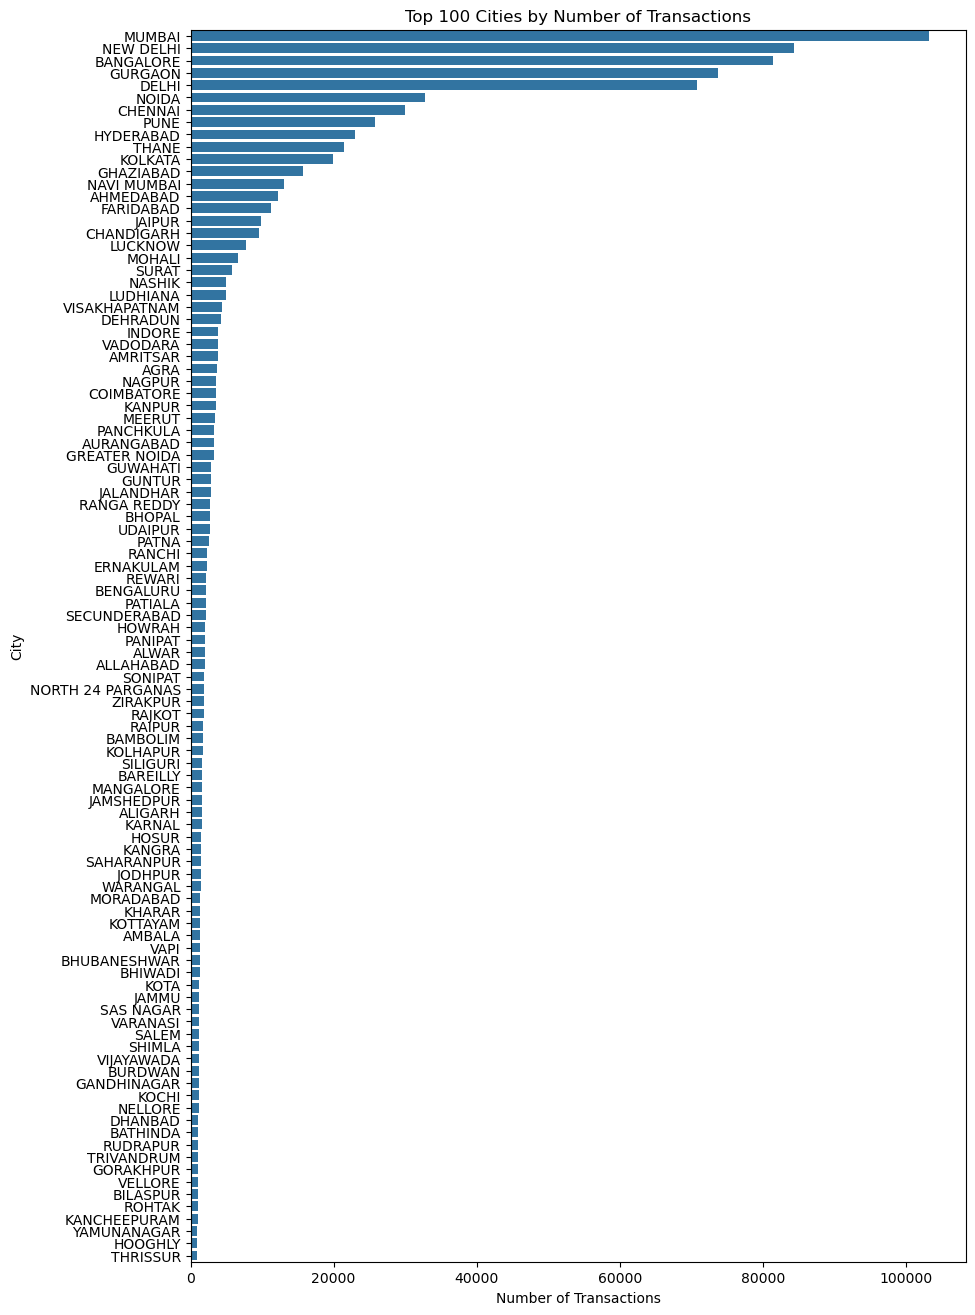

In [29]:
# Selecting the top 100 cities
top_20_cities = transactions_per_city.head(100)

# Plotting
plt.figure(figsize=(10, 16))
sns.barplot(x=top_20_cities.values, y=top_20_cities.index)
plt.xlabel('Number of Transactions')
plt.ylabel('City')
plt.title('Top 100 Cities by Number of Transactions')
plt.show()

#### Generating the top 100 cities show alignment with the major cities in India, namely Mumbai, New Delhi and Bangalore.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>CustAccountBalance</b></font></div>

> <font color='white' style='font-size: 15px;'><b>Plot for the Distribution of Customer Account Balances</b></font>

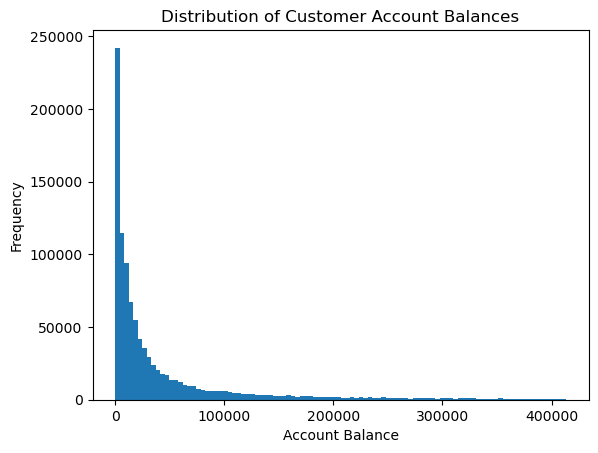

In [30]:
# ploting distribution of customers account balance
plt.hist(df_bank['CustAccountBalance'], bins=100, range=[0, df_bank['CustAccountBalance'].quantile(0.95)])
plt.title('Distribution of Customer Account Balances')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

#### This skewed plot is supposed to show the distribution of customer account balances, yet is hard to read.

> <font color='white' style='font-size: 15px;'><b>Boxplot for the Customer Account Balances</b></font>

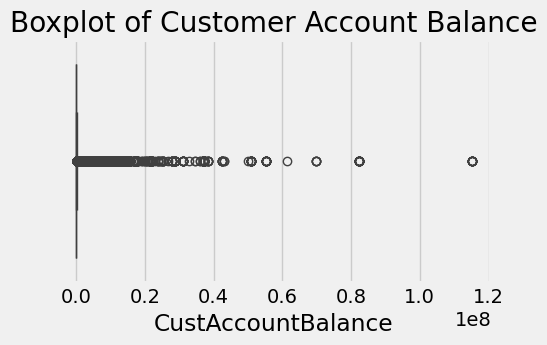

In [31]:
# Ploting customer account balance
# Setting the plot style
plt.style.use("fivethirtyeight")

# Creating a figure
plt.figure(figsize=(5, 3))  # Adjust the size as needed

# Plotting a boxplot for AverageAccountBalance
sns.boxplot(data=df_bank, x='CustAccountBalance')

plt.title('Boxplot of Customer Account Balance')
plt.show()

> <font color='dark' style='font-size: 20px;'><b>Because our data in customer account balance is highly skewed to right we use log transformation to make it more close to a normal distribution</b></font>

> <font color='white' style='font-size: 15px;'><b>Plot for the Log Transformed Distribution of Customer Account Balances</b></font>

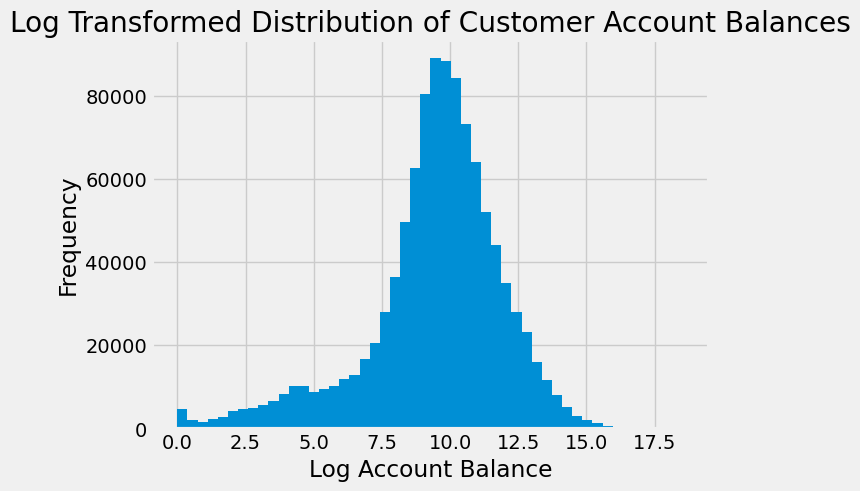

In [32]:
# Apply a log transformation
df_bank['Log_CustAccountBalance'] = np.log(df_bank['CustAccountBalance'] + 1)

plt.hist(df_bank['Log_CustAccountBalance'], bins=50)
plt.title('Log Transformed Distribution of Customer Account Balances')
plt.xlabel('Log Account Balance')
plt.ylabel('Frequency')
plt.show()

#### With the a log transformation, it is easier to see the distribution of customer account balances.

In [33]:
# Average account balance for each customer
# Group by CustomerID and calculate the mean of the log-transformed account balances
average_log_balance_per_customer = df_bank.groupby('CustomerID')['Log_CustAccountBalance'].mean().rename('AverageLogAccountBalance')

# Merge this average log balance back into the main DataFrame
df_bank = df_bank.merge(average_log_balance_per_customer, on='CustomerID')


> <font color='white' style='font-size: 15px;'><b>Plot for the Average Log Transformed Distribution of Customer Account Balances</b></font>

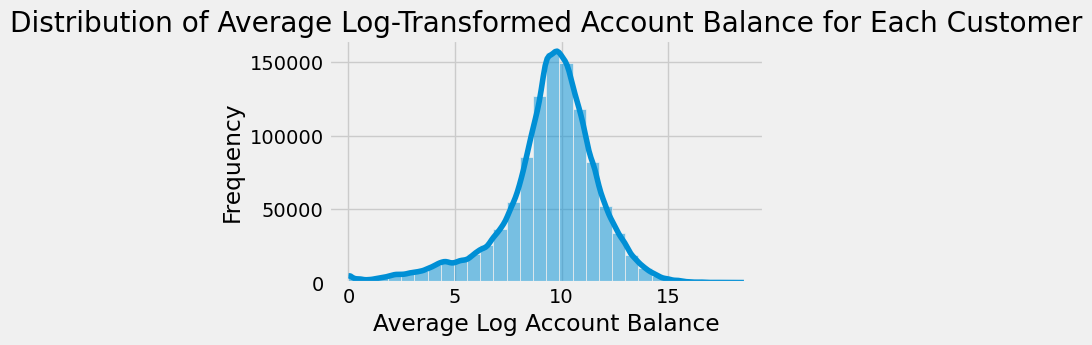

In [34]:
# Plotting the histogram of average log-transformed account balance
plt.figure(figsize=(5, 3))
sns.histplot(df_bank['AverageLogAccountBalance'], kde=True, bins=30)
plt.xlabel('Average Log Account Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Average Log-Transformed Account Balance for Each Customer')
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>TransactionAmount</b></font></div>

In [35]:
# Renaming the 'TransactionAmount (INR)' column to 'TransactionAmount'
df_bank = df_bank.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'})


> <font color='white' style='font-size: 15px;'><b>Boxplot for Transaction Amount</b></font>

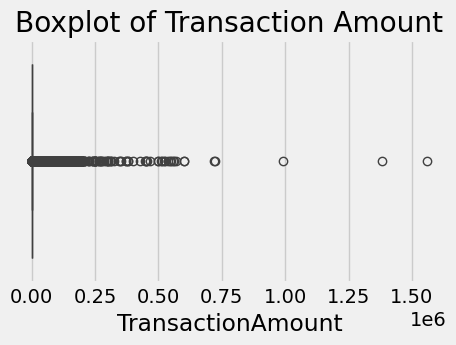

In [36]:
# Setting the plot style
plt.style.use("fivethirtyeight")

# Creating a figure
plt.figure(figsize=(5, 3))  # Adjust the size as needed

# Plotting a boxplot for AverageAccountBalance
sns.boxplot(data=df_bank, x='TransactionAmount')

plt.title('Boxplot of Transaction Amount')
plt.show()

#### Same as customer account balance, we perform a log transformation on transaction amount

> <font color='white' style='font-size: 15px;'><b>Plot for the Log Transformed Distribution of Transaction Amount</b></font>

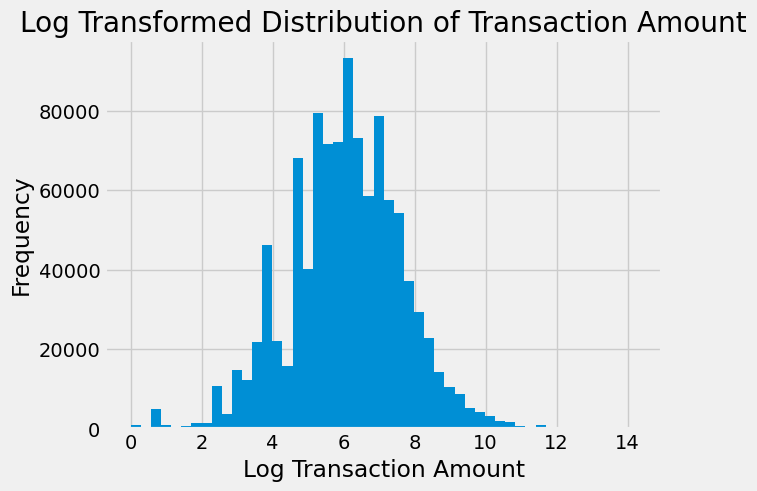

In [37]:
# Apply a log transformation
df_bank['Log_TransactionAmount'] = np.log(df_bank['TransactionAmount'] + 1)

plt.hist(df_bank['Log_TransactionAmount'], bins=50)
plt.title('Log Transformed Distribution of Transaction Amount')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Frequency')
plt.show()

> <font color='white' style='font-size: 15px;'><b>Plot for the Distribution of Log Transformed of Transaction Amount per Customer</b></font>

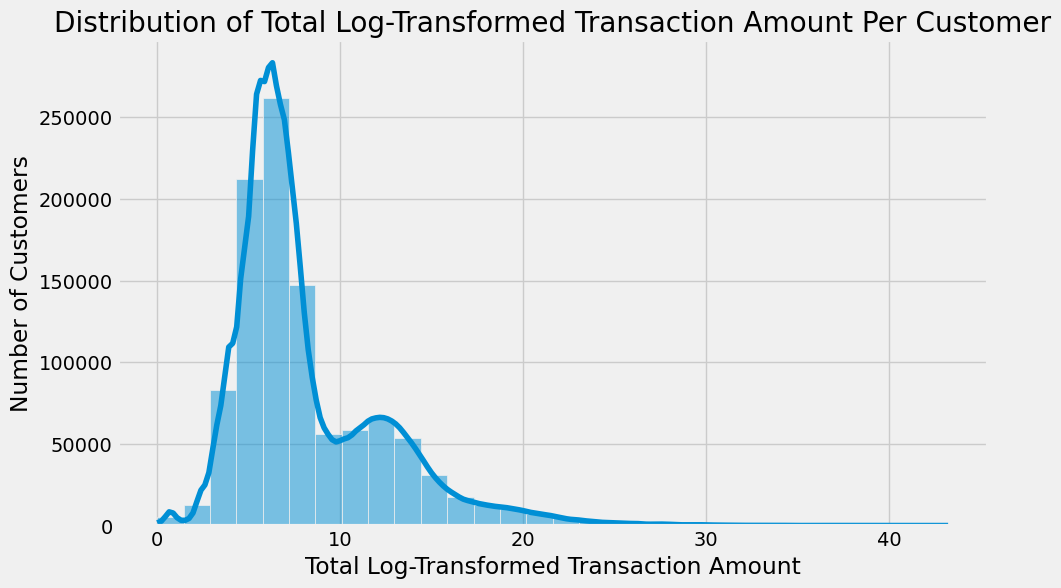

In [38]:
# Defining total transaction amount done by each customer 
# Sum the log-transformed transaction amount for each customer
total_log_transaction_per_customer = df_bank.groupby('CustomerID')['Log_TransactionAmount'].sum().rename('TotalLogTransactionAmount')

# Merge this total back into the main DataFrame
df_bank = df_bank.merge(total_log_transaction_per_customer, on='CustomerID', how='left')

# Plotting the histogram of total log-transformed transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_bank['TotalLogTransactionAmount'], bins=30, kde=True)
plt.xlabel('Total Log-Transformed Transaction Amount')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Log-Transformed Transaction Amount Per Customer')
plt.show()

<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 3</span>
    <h1 style="font-size: 30px;">Feature Engineering</h1>
</div>

> We have created some new features in EDA part, namely: 
>
>> - TransactionDay
>> - TransactionMonth
>> - TransactionHour
>> - Age
>> - Log_CustAccountBalance
>> - AverageLogAccountBalance
>> - Log_TransactionAmount
>> - TotalLogTransactionAmount
>
> Also we create another feature for frequency of transactions for each customer 
>
>> - Transactions_Per_Customer
>
> Log transformed features will be replaced with the primary features for customer account balance and transaction amount 
>
> These columns will be dropped from the dataframe since we will not use them in modelling: 
>
>> - TransactionID
>> - CustAccountBalance
>> - TransactionAmount
>> - TransactionDate



count    881892.000000
mean          1.185144
std           0.449771
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: CustomerID, dtype: float64


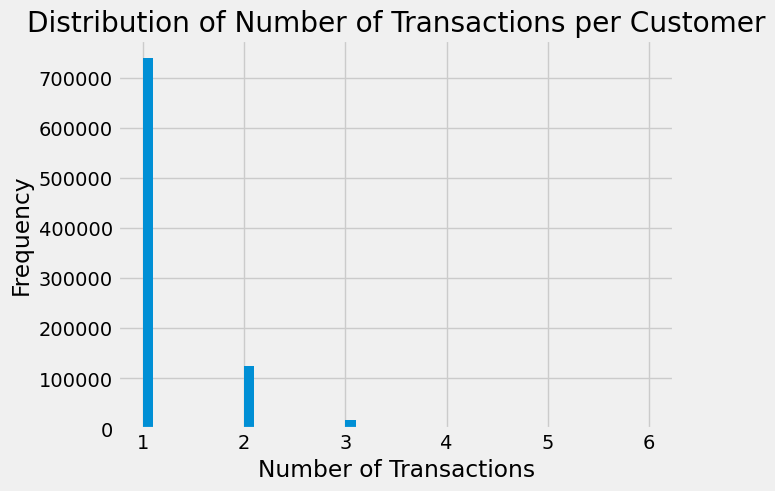

In [39]:
# Count the number of transactions for each customer (Aggregated feature)
transactions_per_customer = df_bank['CustomerID'].value_counts()

# Display summary statistics of the transactions per customer
print(transactions_per_customer.describe())

# Plotting number of transactions done by each customer
transactions_per_customer.hist(bins=50)
plt.title('Distribution of Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

#### Most customers have only had one (1) transaction so far. The amount of customers with 2 or more transactions is a little over 100K.

In [40]:
# Add a new column 'TransactionsPerCustomer' to the DataFrame
df_bank['TransactionsPerCustomer'] = df_bank.groupby('CustomerID')['CustomerID'].transform('count')


In [41]:
# Dropping the specified columns
columns_to_drop = ['TransactionID', 'CustAccountBalance', 'TransactionAmount', 'TransactionDate','CustomerID']
df_bank = df_bank.drop(columns=columns_to_drop, errors='ignore')

In [42]:
df_bank.head()

,CustGender,CustLocation,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,TransactionsPerCustomer
0,F,JAMSHEDPUR,8,2,14,22.0,9.788080,9.788080,3.258097,3.258097,1
1,M,JHAJJAR,8,2,14,-1.0,7.728279,7.728279,10.239960,10.239960,1
2,F,MUMBAI,8,2,14,20.0,9.791183,9.791183,6.131226,6.131226,1
3,F,MUMBAI,8,2,14,43.0,13.672222,10.871061,7.630947,14.410186,2
4,M,MUMBAI,13,8,19,37.0,8.069899,10.871061,6.779240,14.410186,2


In [43]:
# Encoding Categorical Columns
Gender = {'M': 0, 'F': 1}

# Replace values with the encoded numbers
df_bank.replace({"CustGender": Gender }, inplace = True)

In [44]:
from sklearn.preprocessing import OrdinalEncoder

# Reshaping the column to a 2D array as OrdinalEncoder expects 2D inputs
locations = df_bank['CustLocation'].values.reshape(-1, 1)

# Creating the encoder instance
encoder = OrdinalEncoder()

# Fitting and transforming the 'CustLocation' column
df_bank['CustLocation_Encoded'] = encoder.fit_transform(locations)

df_bank.head()

,CustGender,CustLocation,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,TransactionsPerCustomer,CustLocation_Encoded
0,1,JAMSHEDPUR,8,2,14,22.0,9.788080,9.788080,3.258097,3.258097,1,77.0
1,0,JHAJJAR,8,2,14,-1.0,7.728279,7.728279,10.239960,10.239960,1,78.0
2,1,MUMBAI,8,2,14,20.0,9.791183,9.791183,6.131226,6.131226,1,113.0
3,1,MUMBAI,8,2,14,43.0,13.672222,10.871061,7.630947,14.410186,2,113.0
4,0,MUMBAI,13,8,19,37.0,8.069899,10.871061,6.779240,14.410186,2,113.0


In [45]:
# Drop the Custlocation column
df_bank.drop('CustLocation', axis=1, inplace=True)

# Age imputation with KNN

previously we replaced the age value for those row which were negative or more than 100 with -1 (nan)
now we try to impute age using KNN to see which method works bether

In [46]:
from sklearn.impute import KNNImputer
# Select columns for imputation
impute_cols = ['CustGender', 'TransactionDay', 'TransactionMonth', 'TransactionHour', 'AverageLogAccountBalance', 'TotalLogTransactionAmount']

# Create a new DataFrame for imputation
df_imputeage = df_bank[impute_cols]

In [47]:
# Identify rows with 'Age' equal to -1
condition = (df_bank['Age'] == -1)

# KNN imputing for the selected rows
imputer = KNNImputer(n_neighbors=5)
imputed_Age = imputer.fit_transform(df_imputeage[condition])[:, 5]

# Create a copy column 'age_knn' in the DataFrame
df_bank['age_knn'] = df_bank['Age']

# Adding the imputed Age values back to the 'age_knn' column for the selected rows
df_bank.loc[condition, 'age_knn'] = imputed_Age

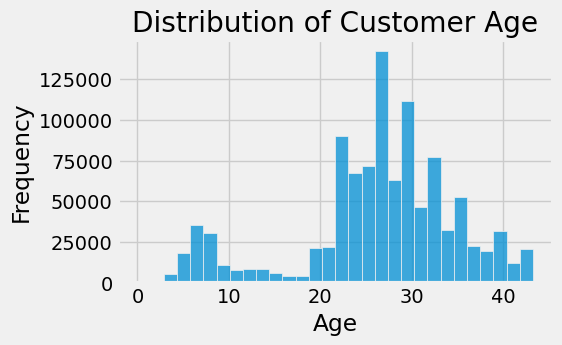

In [48]:
# Plotting
plt.figure(figsize=(5, 3))
sns.histplot(df_bank['age_knn'], bins=30, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

##### Finally, when using `KNN` to impute customer's age, we see that there are also a few customers that are younger than 10 years old. This could be children's parents that open an account for them, e.g., to save money for them for later. According to the distribution plot of imputed age we decide to keep `NaN` values because these values are not interepretable

In [49]:
# Drop the 'age_knn' column
df_bank = df_bank.drop(columns=['age_knn'])
df_bank.head()

,CustGender,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,TransactionsPerCustomer,CustLocation_Encoded
0,1,8,2,14,22.0,9.788080,9.788080,3.258097,3.258097,1,77.0
1,0,8,2,14,-1.0,7.728279,7.728279,10.239960,10.239960,1,78.0
2,1,8,2,14,20.0,9.791183,9.791183,6.131226,6.131226,1,113.0
3,1,8,2,14,43.0,13.672222,10.871061,7.630947,14.410186,2,113.0
4,0,13,8,19,37.0,8.069899,10.871061,6.779240,14.410186,2,113.0


<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 4</span>
    <h1 style="font-size: 30px;">Covariance Matrix</h1>
</div>

>  
> Encoded columns from customer location are excluded due to the high number of columns

> <font color='white' style='font-size: 15px;'><b>Covariance Matrix heatmap</b></font>

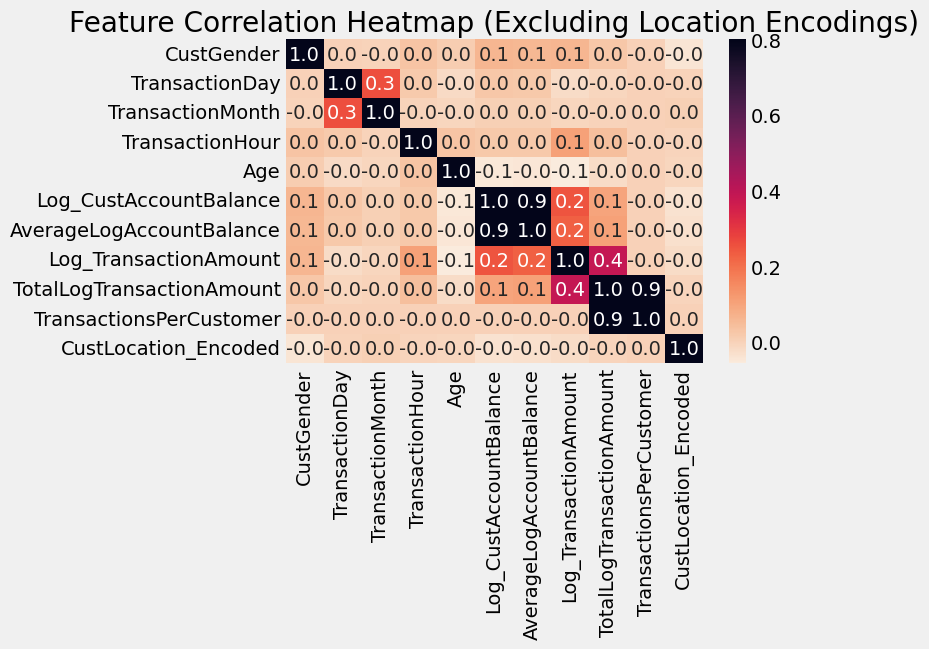

In [50]:
# Calculate the correlation matrix
correlation_matrix = df_bank.corr()

# Plotting the correlation matrix
plt.figure(figsize=(6, 4))  # Adjust the size as needed
sns.heatmap(correlation_matrix, vmin=None, vmax=0.8, cmap='rocket_r', annot=True, fmt='.1f', linecolor='white', cbar=True)
plt.title('Feature Correlation Heatmap (Excluding Location Encodings)')
plt.show()

<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 5</span>
    <h1 style="font-size: 30px;">Principle Component Analysis (PCA)</h1>
</div>

In [51]:
## feature scaling
from sklearn.preprocessing import StandardScaler
# define standard scaler instance
scaler = StandardScaler()
# Fitting the StandardScaler to bank_transactions_data
scaler.fit(df_bank)
# Scaling bank_transactions_data used the fitting Standard scalar
df_bank_scaled = pd.DataFrame(scaler.transform(df_bank), columns=df_bank.columns)

In [52]:
df_bank_scaled.head()

,CustGender,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,TransactionsPerCustomer,CustLocation_Encoded
0,1.647756,-0.882563,-2.034108,-0.275623,-0.257504,0.139624,0.151927,-1.740874,-1.194118,-0.582540,-0.367271
1,-0.606886,-0.882563,-2.034108,-0.275623,-2.259998,-0.685289,-0.745677,2.614528,0.492677,-0.582540,-0.348972
2,1.647756,-0.882563,-2.034108,-0.275623,-0.431634,0.140867,0.153280,0.051432,-0.499979,-0.582540,0.291498
3,1.647756,-0.882563,-2.034108,-0.275623,1.570859,1.695154,0.623861,0.986982,1.500190,1.054565,0.291498
4,-0.606886,-0.197662,0.246074,0.699637,1.048470,-0.548477,0.623861,0.455674,1.500190,1.054565,0.291498


> <font color='white' style='font-size: 15px;'><b>Cummulative principle component index</b></font>

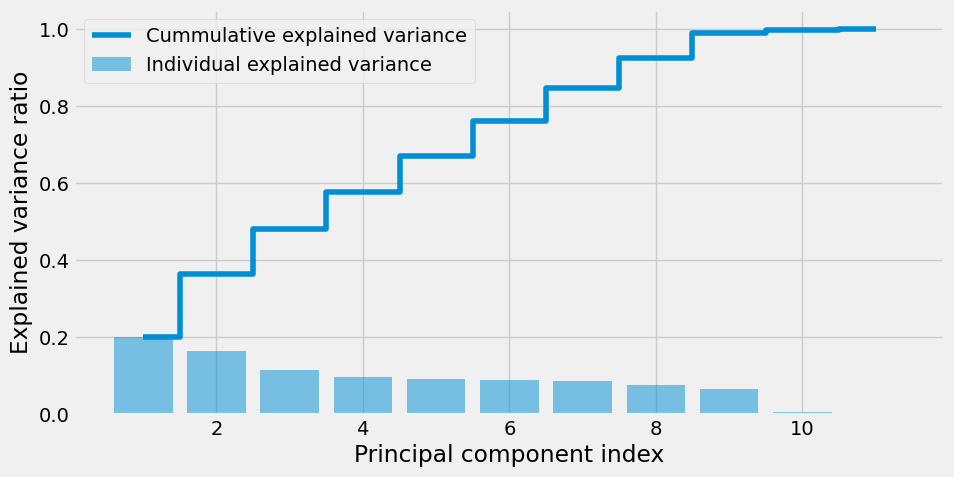

In [53]:
## Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(df_bank_scaled) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='Cummulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [54]:
# We would like to explain 90% of the variance  
var_exp_thres = 0.90

# Calling PCs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(df_bank_scaled)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 90% variance is 8


<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 6</span>
    <h1 style="font-size: 30px;">K-means Model</h1>
</div>

In [55]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer  # $ pip install yellowbrick for the Elbow method

> ##### Kmeans on the important Principal Components (PCs)

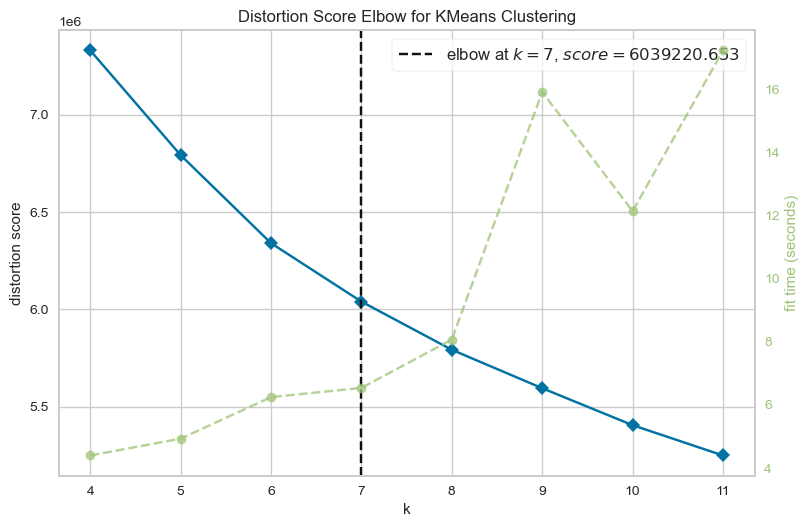

The best cluster number is: 7


In [56]:
## >>> Performing the elbow method, this code takes ±1 minute to run <<<
# Instantiate the clustering model and visualizer
kmeans = KMeans() 
visualizer = KElbowVisualizer(kmeans, k=(4,12))
visualizer.fit(pca_comps)        # Fit the important PCA component data to the visualizer
visualizer.show()        # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [57]:
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
# Saving the cluster labels
Kmeans_clusters_PCs = kmeans_best_cluster.labels_

> <font color='white' style='font-size: 15px;'><b>Plot for clusters computed from important PCs</b></font>

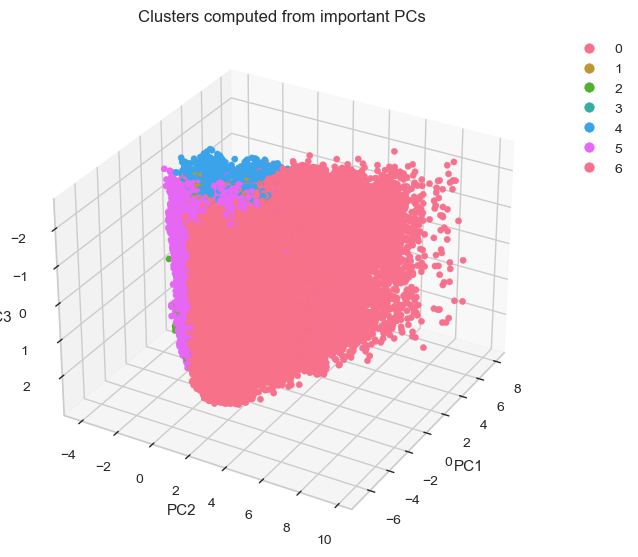

In [58]:
# Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Get a colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
fig = plt.figure(figsize=(20, 7.5), dpi=100)

# Set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
scatter = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c = Kmeans_clusters_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)

# Print the graph
plt.show()

> <font color='white' style='font-size: 15px;'><b>Plot for shows K-means clusters on PCs</b></font>

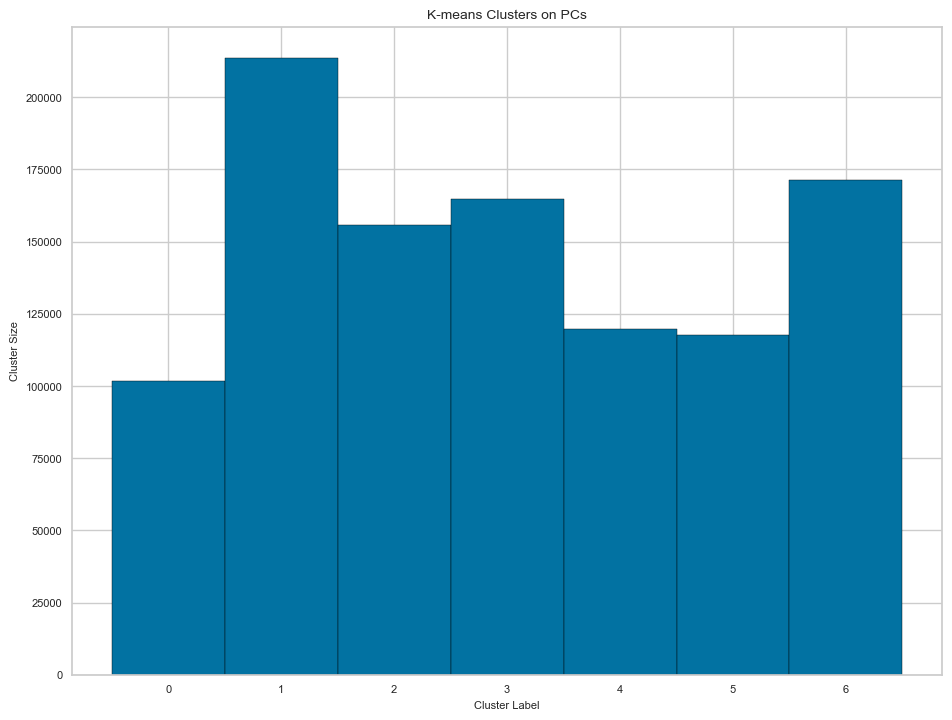

In [59]:
import matplotlib.pyplot as plt

num_clusters = len(set(Kmeans_clusters_PCs))  # Number of unique clusters

# Creating the histogram
plt.figure(figsize=(10, 8), dpi=100)
plt.hist(Kmeans_clusters_PCs, bins=range(num_clusters + 1), edgecolor='black', align='left')

plt.title('K-means Clusters on PCs', fontsize=10)
plt.xlabel('Cluster Label', fontsize=8)
plt.ylabel('Cluster Size', fontsize=8)
plt.xticks(range(num_clusters))  # Set x-ticks to match the number of clusters
plt.tick_params(axis='both', which='major', labelsize=8)

# Display the plot
plt.show()


> <font color='white' style='font-size: 15px;'><b>DBI scores on K-means clustering</b></font>

In [60]:
## >>> This code takes 200 minutes to run <<<
from sklearn import metrics
sc = []
dbi = []

# Metrics from K-means PC features method
sc.append(metrics.silhouette_score(pca_comps, Kmeans_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, Kmeans_clusters_PCs))

clusteting_methods = ['Kmean_on_PCs']

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)
df_metrics

,silhouette_score,DBI
clusteting_methods,,
Kmean_on_PCs,0.141177,1.649832


Silhouette_score: 0.141177
DBI: 1.649832

In [61]:
# Adding a cluster column to the original dataset
df_bank['cluster'] = Kmeans_clusters_PCs
df_bank.head()

,CustGender,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,TransactionsPerCustomer,CustLocation_Encoded,cluster
0,1,8,2,14,22.0,9.788080,9.788080,3.258097,3.258097,1,77.0,2
1,0,8,2,14,-1.0,7.728279,7.728279,10.239960,10.239960,1,78.0,4
2,1,8,2,14,20.0,9.791183,9.791183,6.131226,6.131226,1,113.0,2
3,1,8,2,14,43.0,13.672222,10.871061,7.630947,14.410186,2,113.0,6
4,0,13,8,19,37.0,8.069899,10.871061,6.779240,14.410186,2,113.0,6


<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 8</span>
    <h1 style="font-size: 30px;">Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</h1>
</div>

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 

In [63]:
## >>> This code takes around 5:00-5:30 minutes to run <<<
# min_samples >= P+1, with P the number of features
min_samples = pca_comps.shape[1] + 1 

#DBSCAN model building 
dbscan = DBSCAN(eps = 0.5, min_samples = min_samples)
db_clusters = dbscan.fit_predict(pca_comps)

print('dbscan has created clusters:', list(set(db_clusters)))

dbscan has created clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

#### DBSCAN has created 771 clusters with `eps = 0.5`. We will use the elbow method plot to find the most efficient epsilon.

> <font color='white' style='font-size: 15px;'><b>Elbow method plot for DBSCAN</b></font>

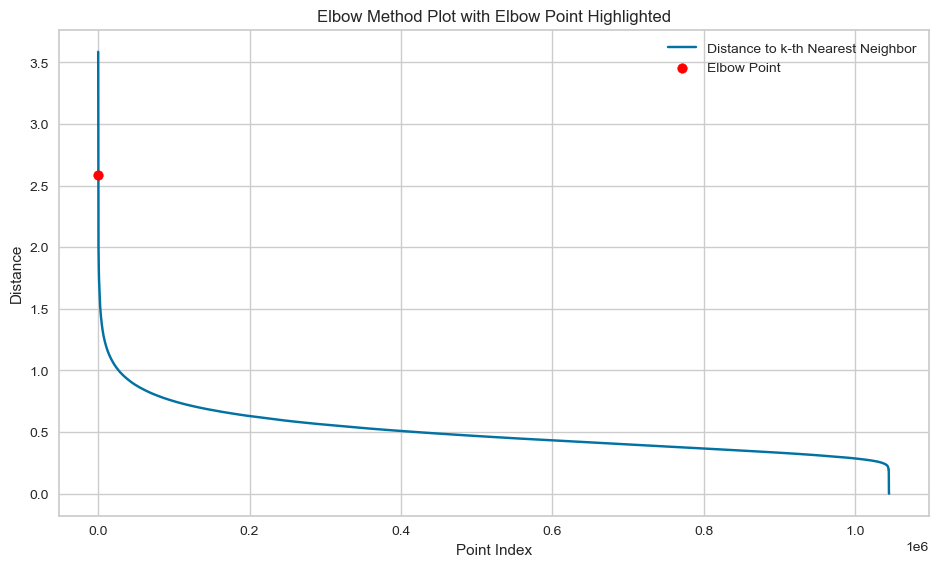

(43, 2.5851967455892604)

In [64]:
# This code takes ±3 minutes to run
# Trying to find the exact point in the elbow plot where the rate of decrease sharply changes

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

k = min_samples

# Fitting the nearest neighbors model
knn_fit = NearestNeighbors(n_neighbors=k).fit(pca_comps)
distances, indices = knn_fit.kneighbors(pca_comps)
further_neighbor = distances[:, -1]
further_neighbor[::-1].sort()

# Using the KneeLocator to find the elbow point with adjusted sensitivity
# Increase the sensitivity by decreasing the S parameter
knee = KneeLocator(range(len(further_neighbor)), further_neighbor, curve='convex', direction='decreasing', S=0.001)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(further_neighbor, label='Distance to k-th Nearest Neighbor')
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.grid(True)

# If an elbow is detected, highlight it
if knee.knee:
    plt.scatter(knee.knee, further_neighbor[knee.knee], color='red', label='Elbow Point', zorder=3)
    plt.legend()

plt.title('Elbow Method Plot with Elbow Point Highlighted')
plt.show()

# Return the knee point for reference
knee.knee, further_neighbor[knee.knee] if knee.knee else None

##### Increasing the epsilon parameter in DBSCAN generally results in fewer clusters. Epsilon (`eps`) defines the maximum distance between two samples for one to be considered as in the neighborhood of the other. With a larger epsilon, more points are considered close enough to be in the same cluster, leading to larger but fewer clusters. Conversely, a smaller epsilon tends to create more clusters, as points need to be closer together to be considered part of the same cluster.
##### Based on this, we set `eps = 2.58`

In [ ]:
# # This code failed to run, error message: Kernel crashed
# # DBSCAN final model building
# dbscan = DBSCAN(eps = 2.58, min_samples = min_samples)
# db_clusters_PCs = dbscan.fit_predict(pca_comps)
# print('DBSCAN has created clusters:', list(set(db_clusters_PCs)))

> <font color='white' style='font-size: 15px;'><b>DBI scores for DBSCAN clustering</b></font>

In [ ]:
# # Because the above code failed to run, this code is non-effective either
# # Metrics from DBSCAN final model
# sc.append(metrics.silhouette_score(pca_comps, db_clusters_PCs, metric='euclidean'))
# dbi.append(metrics.davies_bouldin_score(pca_comps, db_clusters_PCs))
# clusteting_methods.append('DBSCAN_on_PCs')

# # Creating a pandas dataframe
# d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
# df_metrics = pd.DataFrame(d)
# df_metrics.set_index('clusteting_methods', inplace = True)
# df_metrics

<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 9</span>
    <h1 style="font-size: 30px;">Bonus: High Density-Based Spatial Clustering of Applications with Noise (HDBSCAN) </h1>
</div>

In [ ]:
# >>> This code took 9 minutes to run <<<

import hdbscan

# Initialize HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=k, min_samples=30)

# Fit HDBSCAN on the PCA components
hdb_clusters = hdbscan_clusterer.fit_predict(pca_comps)

# Visualize the condensed tree
hdbscan_clusterer.condensed_tree_.plot(select_clusters=True)

# Check the unique clusters formed
unique_clusters = np.unique(hdb_clusters)
print(unique_clusters)

#### HDBSCAN has created 6 clusters

> <font color='white' style='font-size: 15px;'><b>DBI scores for HDBSCAN clustering</b></font>

In [ ]:
# >>> This code took 216 minutes to run <<<
from sklearn import metrics
sc = []
dbi = []

# Metrics from HBDSCAN
sc.append(metrics.silhouette_score(pca_comps, hdb_clusters, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, hdb_clusters))

# Define clustering methods
clustering_methods = ['DBSCAN_on_PCs']

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clustering_methods':clustering_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clustering_methods', inplace = True)
df_metrics

silhouette_score: 0.115786 
DBI score: 1.568556

<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section -</span>
    <h1 style="font-size: 30px;">Final: Summary of clustering</h1>
</div>

> <font color='gold' style='font-size: 15px;'><b>Selection of the model</b></font>
>
> In clustering, the Silhouette Score and Davies-Bollin Index (DBI) are both used to evaluate the quality of clustering, but they measure different aspects:
>> **Silhouette Score:**
>
> Ranges from -1 to 1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
>
>> **Davies-Bollin Index (DBI):**
> 
> Lower values indicate better clustering. A lower DBI signifies that the clusters are more compact and better separated.
>
> <font color='gold' style='font-size: 15px;'><b>Selection of the model</b></font>
>> **Kmeans**
> 
> <font color='green'><b>Silhouette Score: 0.141177</b></font> /// <font color='yellow'><b>DBI: 1.649832</b></font>
>
>> **DBSCAN**
> 
> This code failed to run.
> 
>> **HDBSCAN**
> 
> <font color='yellow'><b>Silhouette Score: 0.115786</b></font> /// <font color='green'><b>DBI: 1.568556</b></font>

In [ ]:
# Reshape the encoded column to 2D array for inverse_transform
encoded_locations = df_bank['CustLocation_Encoded'].values.reshape(-1, 1)

# Using inverse_transform to revert back to original values
df_bank['CustLocation'] = encoder.inverse_transform(encoded_locations)

# Inverse mapping for gender
inverse_gender = {0: 'M', 1: 'F'}

# Replace encoded values with original values
df_bank['CustGender'] = df_bank['CustGender'].replace(inverse_gender)

# Print dataframe
df_bank.head()

,CustGender,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,TransactionsPerCustomer,CustLocation_Encoded,cluster,CustLocation
0,F,8,2,14,22.0,9.788080,9.788080,3.258097,3.258097,1,77.0,2,JAMSHEDPUR
1,M,8,2,14,-1.0,7.728279,7.728279,10.239960,10.239960,1,78.0,0,JHAJJAR
2,F,8,2,14,20.0,9.791183,9.791183,6.131226,6.131226,1,113.0,2,MUMBAI
3,F,8,2,14,43.0,13.672222,10.871061,7.630947,14.410186,2,113.0,5,MUMBAI
4,M,13,8,19,37.0,8.069899,10.871061,6.779240,14.410186,2,113.0,5,MUMBAI


> <font color='white' style='font-size: 15px;'><b>Plots for cluster summary, based on K-means</b></font>

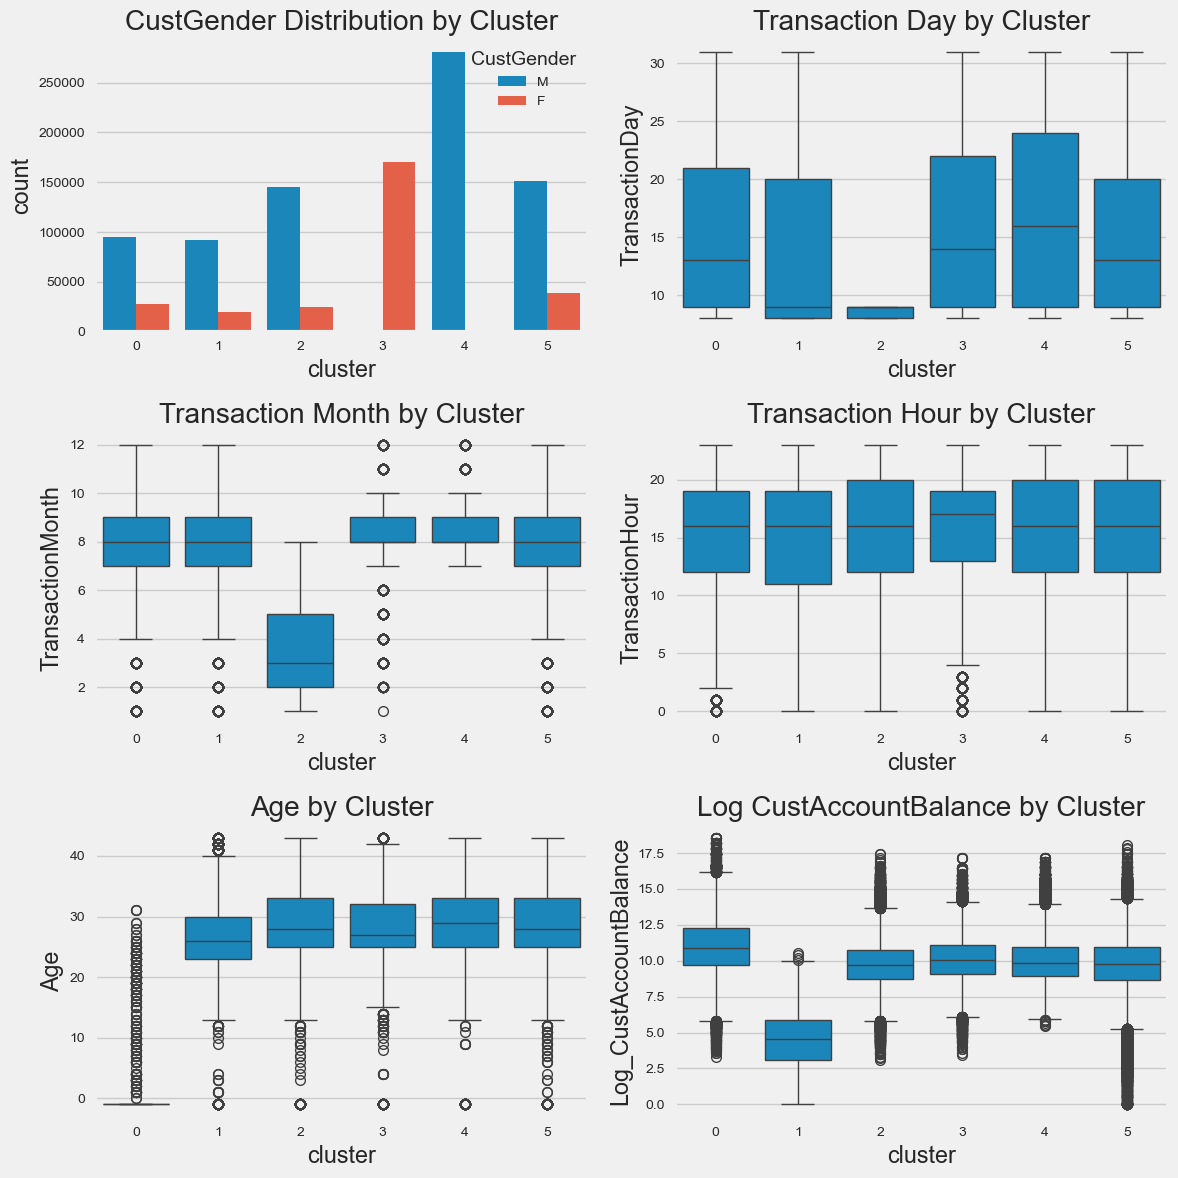

In [ ]:
import matplotlib.gridspec as gridspec

# Set up the grid and figure for the subplots
gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(12, 12))

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

# Plotting various charts
# Distribution of CustGender across clusters
sns.countplot(data=df_bank, x="cluster", hue="CustGender", ax=ax1)
ax1.set_title("CustGender Distribution by Cluster")

# Distribution of TransactionDay across clusters
sns.boxplot(data=df_bank, x="cluster", y="TransactionDay", ax=ax2)
ax2.set_title("Transaction Day by Cluster")

# Distribution of TransactionMonth across clusters
sns.boxplot(data=df_bank, x="cluster", y="TransactionMonth", ax=ax3)
ax3.set_title("Transaction Month by Cluster")

# Distribution of TransactionHour across clusters
sns.boxplot(data=df_bank, x="cluster", y="TransactionHour", ax=ax4)
ax4.set_title("Transaction Hour by Cluster")

# Boxplot of Age across clusters
sns.boxplot(data=df_bank, x="cluster", y="Age", ax=ax5)
ax5.set_title("Age by Cluster")

# Boxplot of Log_CustAccountBalance across clusters
sns.boxplot(data=df_bank, x="cluster", y="Log_CustAccountBalance", ax=ax6)
ax6.set_title("Log CustAccountBalance by Cluster")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

> <font color='gold' style='font-size: 15px;'><b>Interpretation of the above figures:</b></font>
>>> 1. **Customer gender distribution**:
>>   - Clusters 0 and 1 have a higher count of males (M) than females (F). Cluster 0 has the most significant disparity, suggesting a segment with a strong male majority.
>>   - Clusters 2 through 6 are more balanced in gender distribution, with cluster 5 showing a slight male majority.
>
>>> 2. **Transaction day**:
>>   - The transaction day is consistent across all clusters with medians around the middle of the month. Clusters 0 and 1 have wider ranges, indicating more variability in transaction dates.
>
>>> 3. **Transaction month**:
>>   - Transactions are spread throughout the year in all clusters. Clusters 1 and 4 have tighter interquartile ranges, suggesting more consistent transaction timings within specific months.
>
>>> 4. **Transaction hour**:
>>  - Transaction hours are broadly similar across clusters, with a slight variation in medians but generally centered around midday hours. Outliers are present in all clusters, indicating transactions that occur atypical hours.
>
>>> 5. **Customer age**:
>>   - Median ages are in the 20s and 30s across clusters, with cluster 5 having the widest range, indicating a broad age spectrum. Clusters 0, 1, and 4 have a slightly higher median age, hinting at a more mature customer segment.
>
>>> 6. **Log customer account balance**:
>>   - This shows significant variation in account balances across clusters. Clusters 0 and 1 exhibit higher median account balances, whereas clusters 2, 3, and 6 show lower medians. Cluster 5 has the widest range and most outliers, indicating great variability in financial status within this cluster.
>
> <font color='gold' style='font-size: 15px;'><b>Summary:</b></font>
>
> We have segmented the customers in the dataset into seven customer segments using Kmeans. Each cluster reflects unique customer segments defined by gender, age, transaction timing, and account balance. 
>
> For instance, clusters 0 and 1 might represent older, male-dominated, and high account balance segments, with cluster 0 having more varied transaction patterns.
>
> Clusters 2 and 3 could represent younger people, with a relatively lower account balance. 
>
> Cluster 5 stands out as the most diverse in terms of both age and account balance, possibly a mixed segment with varied customer behaviors or stages in life. 
>
> These insights could inform targeted strategies for product offerings, customer service, and marketing. The consistency in transaction hours suggests that the timing of services could be uniformly approached across segments, while the variability in other aspects might require more tailored approaches.